In [7]:
import numpy as np
import pandas as pd

In [8]:
df1 = pd.read_csv("./dataset/Car_SupplyChainManagementDataSet.csv")

In [9]:
df1

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
0,1,542 Dayton Center,Bubbletube,871-57-6028,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,...,2019/03/14,Standard Class,Truck,99522,744796.41,1,0.83,diners-club-carte-blanche,30408016042565,Bad
1,2,0674 Springview Circle,Tagopia,337-64-4060,9444,Toyota,Tundra,Crimson,2010,672222.04,...,2019/03/06,Standard Class,Truck,56398,794773.17,1,0.79,jcb,3549221112237767,Good
2,3,70 Autumn Leaf Center,Zoomdog,218-19-1802,253,GMC,Savana 1500,Crimson,2011,504465.72,...,2019/01/20,Second Class,Air,60674,968244.90,1,0.28,jcb,3557159608180902,Okay
3,4,649 Corben Lane,Oozz,635-15-3112,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,...,2019/03/16,First Class,Truck,32885,942213.82,2,0.76,jcb,3529909223663921,Very Bad
4,5,94 Namekagon Point,Kare,849-23-6788,8905,Mercury,Mariner,Teal,2009,699890.24,...,2019/01/29,Second Class,Air,48232,879519.57,1,0.50,china-unionpay,5602235978541517,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,13 Dunning Alley,Edgeify,352-07-3630,7534,Chevrolet,Monte Carlo,Fuscia,2004,718778.77,...,2019/03/16,Second Class,Truck,68524,900610.31,2,0.59,maestro,5018690487820810,Okay
996,997,60 Fairview Hill,Zooveo,788-64-6027,7982,Subaru,Outback,Khaki,2006,689650.37,...,2019/04/08,Standard Class,Air,84152,987645.58,1,0.33,jcb,3576733373268774,Okay
997,998,026 Calypso Pass,Geba,439-17-9977,8051,Audi,Q7,Green,2012,525136.96,...,2019/01/25,Second Class,Air,74141,870962.70,2,0.25,diners-club-carte-blanche,30375193692530,Okay
998,999,73343 Oriole Court,Janyx,898-97-6903,7072,Mazda,B-Series,Khaki,2006,719917.26,...,2019/02/21,First Class,Air,20404,778839.18,1,0.78,jcb,3556620008720416,Very Bad


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SupplierID              1000 non-null   int64  
 1   SupplierAddress         1000 non-null   object 
 2   SupplierName            1000 non-null   object 
 3   SupplierContactDetails  1000 non-null   object 
 4   ProductID               1000 non-null   int64  
 5   CarMaker                1000 non-null   object 
 6   CarModel                1000 non-null   object 
 7   CarColor                1000 non-null   object 
 8   CarModelYear            1000 non-null   int64  
 9   CarPrice                1000 non-null   float64
 10  CustomerID              1000 non-null   object 
 11  CustomerName            1000 non-null   object 
 12  Gender                  1000 non-null   object 
 13  JobTitle                1000 non-null   object 
 14  PhoneNumber             1000 non-null   o

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 

In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [14]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/var/folders/zy/xs4hwllj62v0ykj5mlrg9bdm0000gn/T/ipykernel_2248/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/zy/xs4hwllj62v0ykj5mlrg9bdm0000gn/T/ipykernel_2248/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/zy/xs4hwllj62v0ykj5mlrg9bdm0000gn/T/ipykernel_2248/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/zy/xs4hwllj62v0ykj5mlrg9bdm0000gn/T/ipykernel_2248/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as t

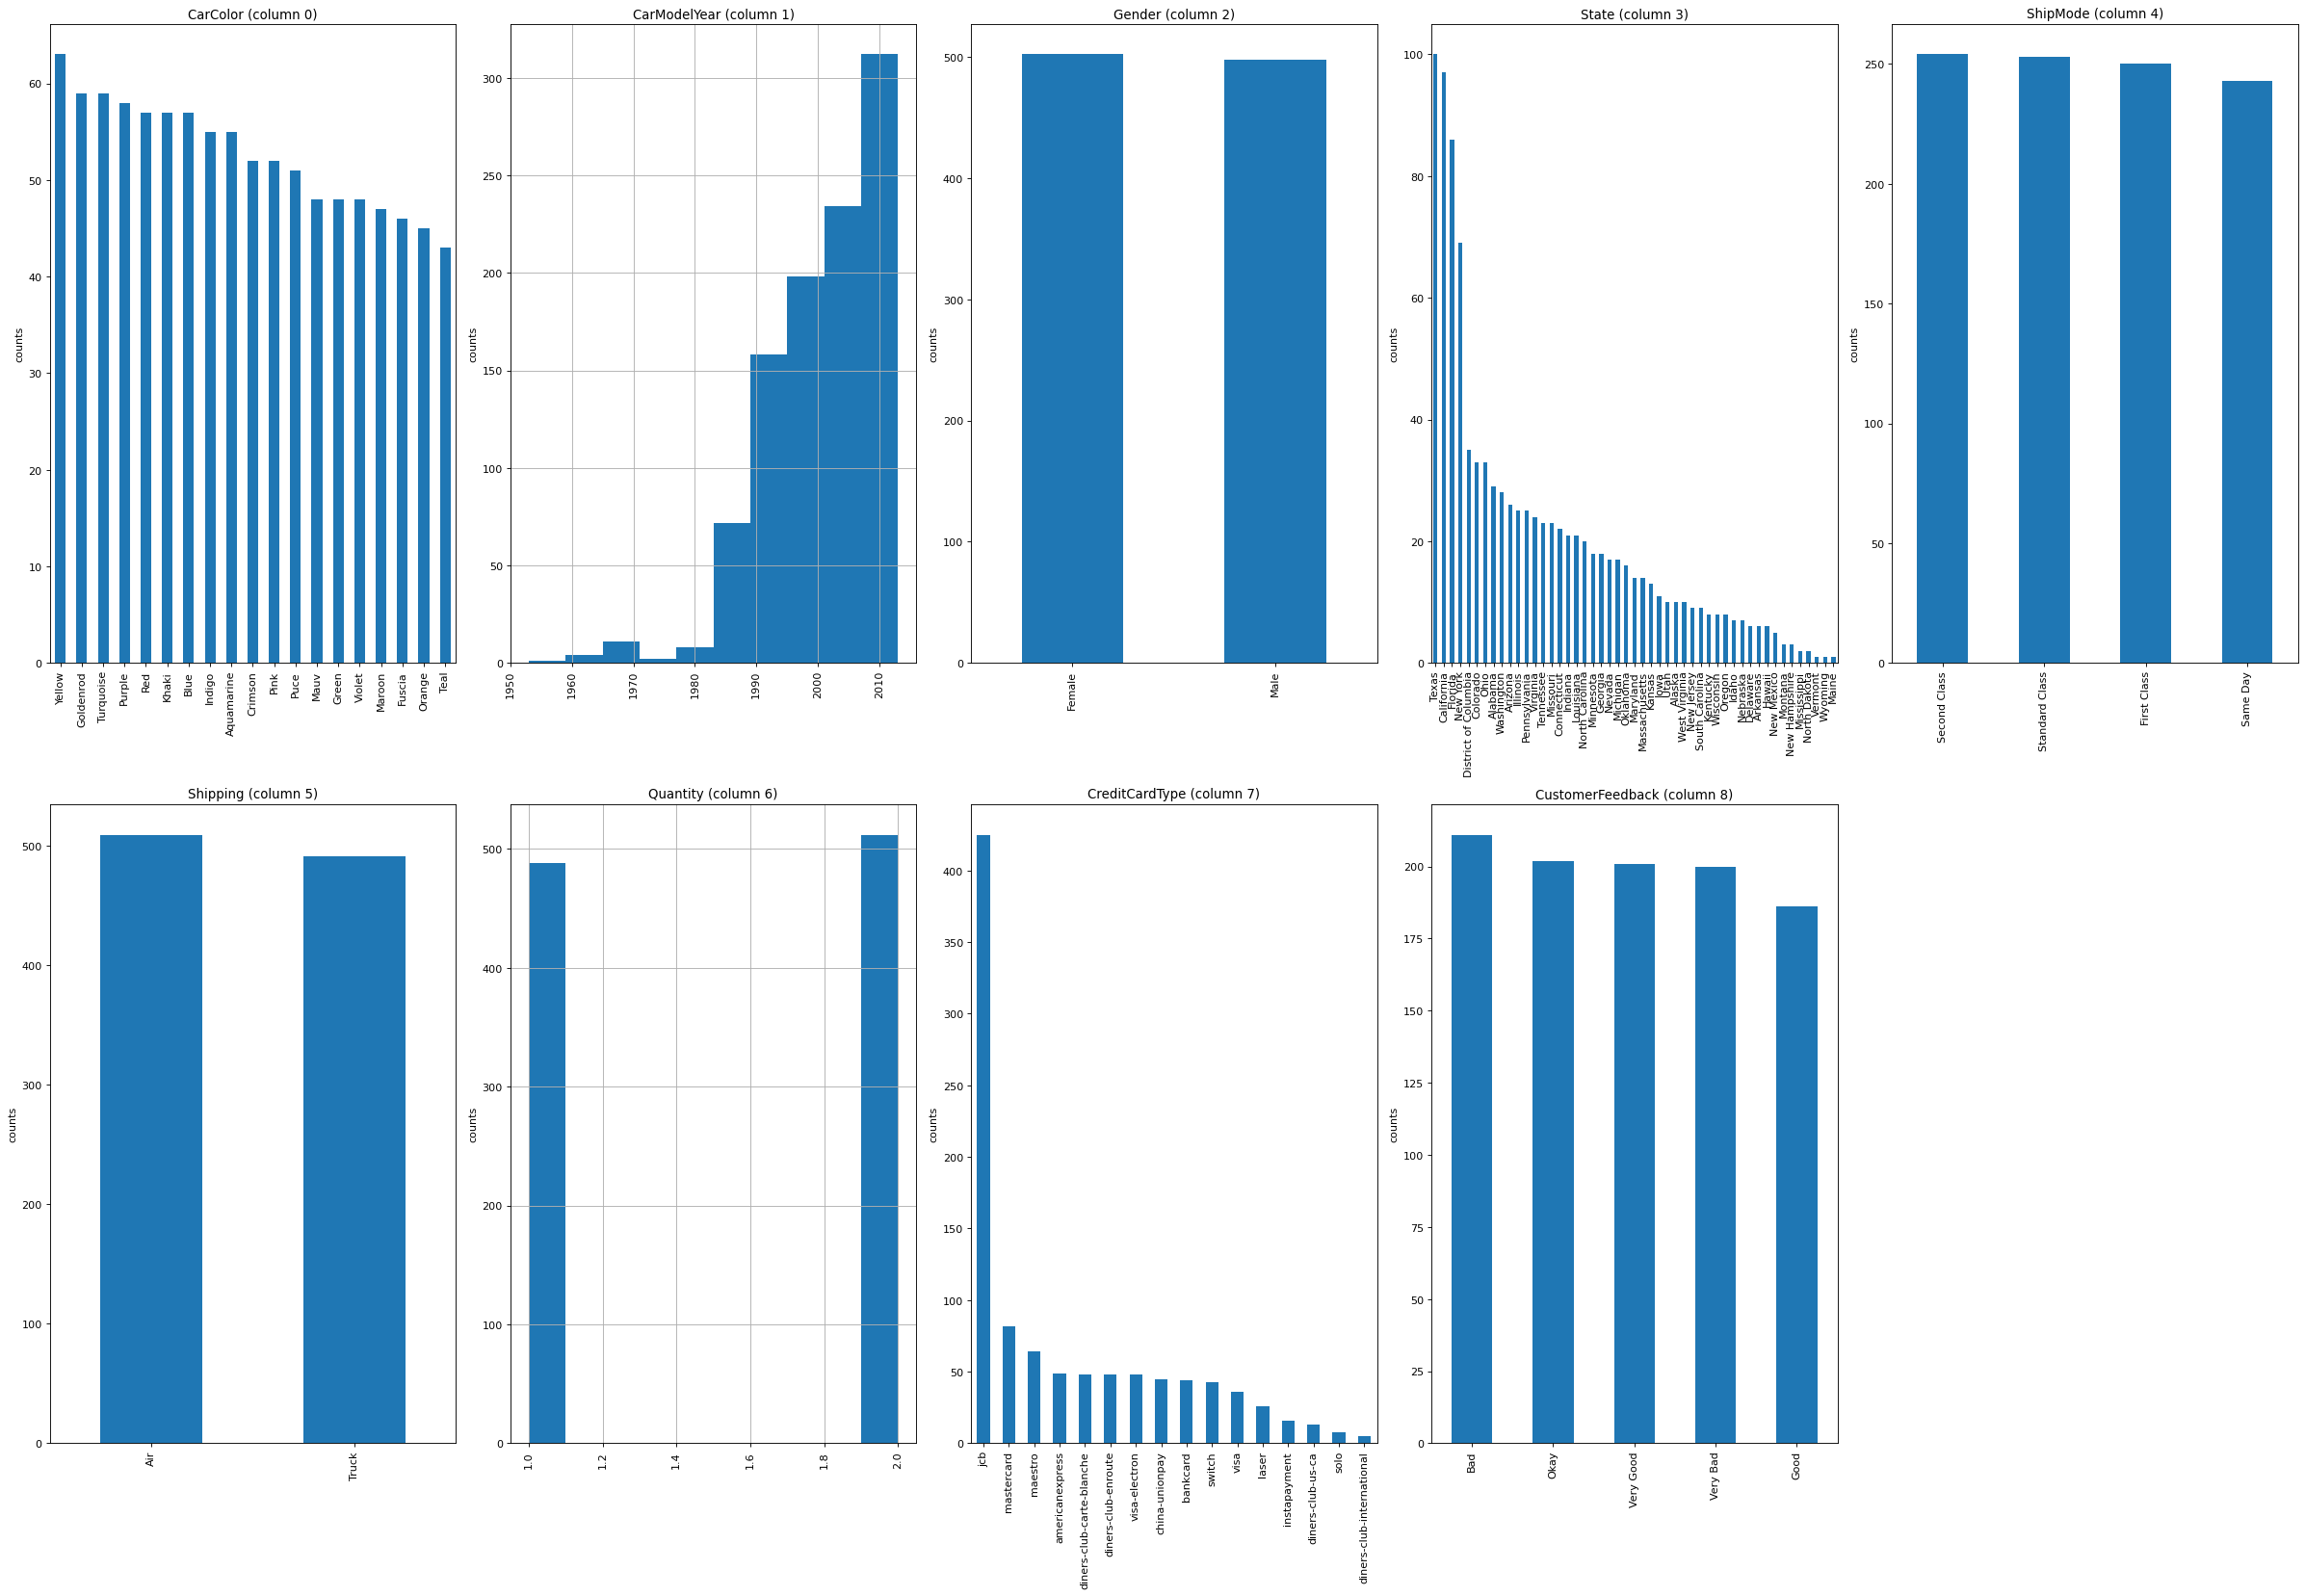

In [15]:
plotPerColumnDistribution(df1, 10, 5)

In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('./dataset/Car_SupplyChainManagementDataSet.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Car_SupplyChainManagementDataSet.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 33 columns


/var/folders/zy/xs4hwllj62v0ykj5mlrg9bdm0000gn/T/ipykernel_2248/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


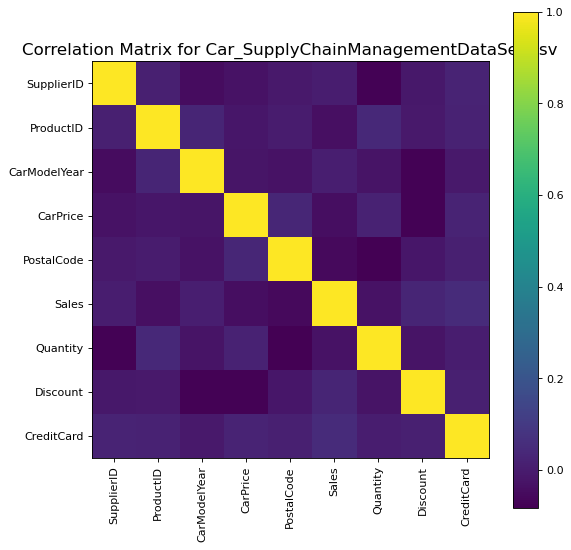

In [17]:
plotCorrelationMatrix(df1, 8)

/var/folders/zy/xs4hwllj62v0ykj5mlrg9bdm0000gn/T/ipykernel_2248/844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


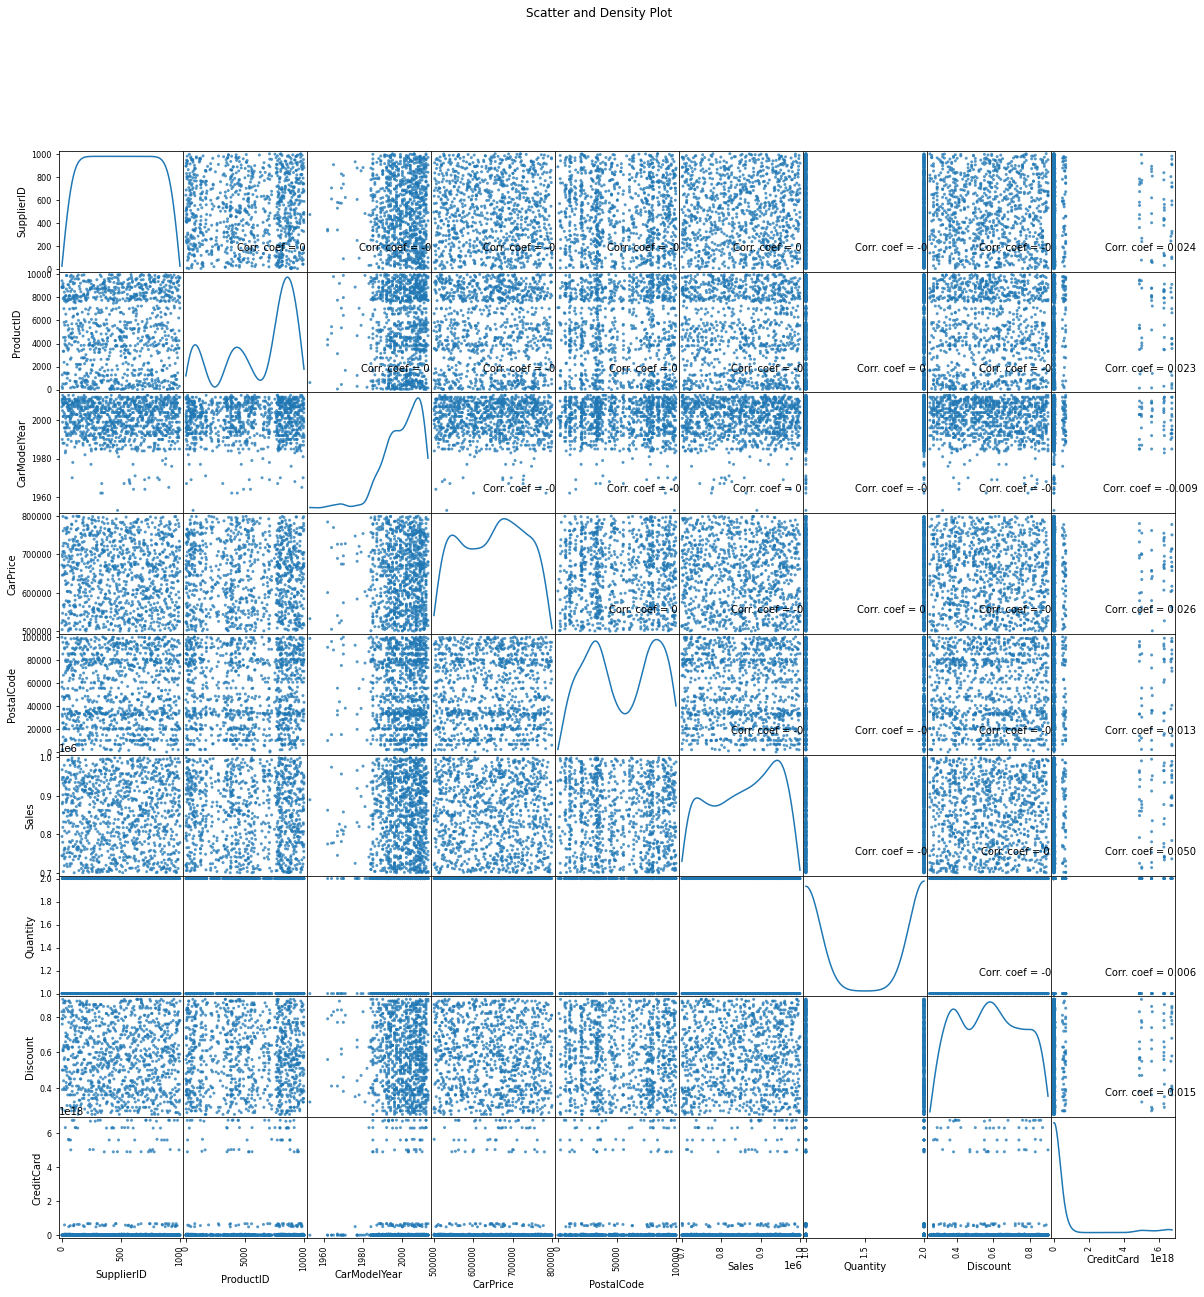

In [18]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
print(data.info())

In [23]:
Shipping=df1.loc[df1.Shipping=="Truck"]
Shipping.head()


,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
0,1,542 Dayton Center,Bubbletube,871-57-6028,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,...,2019/03/14,Standard Class,Truck,99522,744796.41,1,0.83,diners-club-carte-blanche,30408016042565,Bad
1,2,0674 Springview Circle,Tagopia,337-64-4060,9444,Toyota,Tundra,Crimson,2010,672222.04,...,2019/03/06,Standard Class,Truck,56398,794773.17,1,0.79,jcb,3549221112237767,Good
3,4,649 Corben Lane,Oozz,635-15-3112,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,...,2019/03/16,First Class,Truck,32885,942213.82,2,0.76,jcb,3529909223663921,Very Bad
6,7,85 Coleman Parkway,Roombo,479-97-2408,101,Subaru,Impreza,Indigo,1999,546977.55,...,2019/01/24,Same Day,Truck,2208,883836.81,2,0.79,diners-club-carte-blanche,30528106894581,Very Bad
7,8,30230 Westerfield Pass,Wordify,371-69-6870,8854,BMW,X6,Purple,2013,528353.80,...,2019/01/01,Second Class,Truck,25336,779626.29,1,0.90,jcb,3589144247894735,Bad


In [24]:
Shipping.count()

SupplierID                491
SupplierAddress           491
SupplierName              491
SupplierContactDetails    491
ProductID                 491
CarMaker                  491
CarModel                  491
CarColor                  491
CarModelYear              491
CarPrice                  491
CustomerID                491
CustomerName              491
Gender                    491
JobTitle                  491
PhoneNumber               491
EmailAddress              491
City                      491
Country                   491
CountryCode               491
State                     491
CustomerAddress           491
OrderDate                 491
OrderID                   491
ShipDate                  491
ShipMode                  491
Shipping                  491
PostalCode                491
Sales                     491
Quantity                  491
Discount                  491
CreditCardType            491
CreditCard                491
CustomerFeedback          491
dtype: int

In [25]:
air=df1.loc[df1.Shipping=="Air"]
air.head()

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
2,3,70 Autumn Leaf Center,Zoomdog,218-19-1802,253,GMC,Savana 1500,Crimson,2011,504465.72,...,2019/01/20,Second Class,Air,60674,968244.90,1,0.28,jcb,3557159608180902,Okay
4,5,94 Namekagon Point,Kare,849-23-6788,8905,Mercury,Mariner,Teal,2009,699890.24,...,2019/01/29,Second Class,Air,48232,879519.57,1,0.50,china-unionpay,5602235978541517,Bad
5,6,46347 Dunning Drive,Rhynyx,378-57-0118,8877,Toyota,Land Cruiser,Crimson,2005,694373.94,...,2019/03/24,Standard Class,Air,31136,947785.40,2,0.39,laser,6706247841149207,Good
8,9,4 Coleman Street,Skyvu,717-19-7839,9043,Mitsubishi,Galant,Orange,2011,706964.35,...,2019/01/16,First Class,Air,85035,818364.32,2,0.50,jcb,3557048508901444,Okay
10,11,7 Esch Trail,Layo,547-88-4825,9212,Mercedes-Benz,M-Class,Mauv,2002,722114.57,...,2019/03/29,Same Day,Air,7112,932957.69,1,0.62,diners-club-enroute,201441036983941,Very Bad


In [28]:
air.count()

SupplierID                509
SupplierAddress           509
SupplierName              509
SupplierContactDetails    509
ProductID                 509
CarMaker                  509
CarModel                  509
CarColor                  509
CarModelYear              509
CarPrice                  509
CustomerID                509
CustomerName              509
Gender                    509
JobTitle                  509
PhoneNumber               509
EmailAddress              509
City                      509
Country                   509
CountryCode               509
State                     509
CustomerAddress           509
OrderDate                 509
OrderID                   509
ShipDate                  509
ShipMode                  509
Shipping                  509
PostalCode                509
Sales                     509
Quantity                  509
Discount                  509
CreditCardType            509
CreditCard                509
CustomerFeedback          509
dtype: int

In [29]:
air = air[-491:]
charges_yes = Shipping.CarPrice
charges_no = air.CarPrice

In [40]:
print('Average vechile price transported through truck {} and by Air {} '.format(charges_yes.mean(),charges_no.mean()))

Average vechile price transported through truck 647713.2612219957 and by Air 650642.7538085534 


In [37]:

import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 


In [38]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = -0.535740699982755 , Pvalue =0.5922593325777787 , OnetailPvalue = 0.29612966628888937


In [41]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for truck are less than or equal to air.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for truck are less than air.")

Conclusion:Since P value 0.29612966628888937 is greater than alpha 0.05 
Failed to Reject Null Hypothesis that Average charges for truck are less than air.


In [44]:
#Country
contigency= pd.crosstab(df1.State, df1.Shipping)
contigency

Shipping,Air,Truck
State,,
Alabama,17,12
Alaska,8,2
Arizona,13,13
Arkansas,2,4
California,40,57
Colorado,9,24
Connecticut,13,9
Delaware,3,3
District of Columbia,24,11


<AxesSubplot:xlabel='State'>

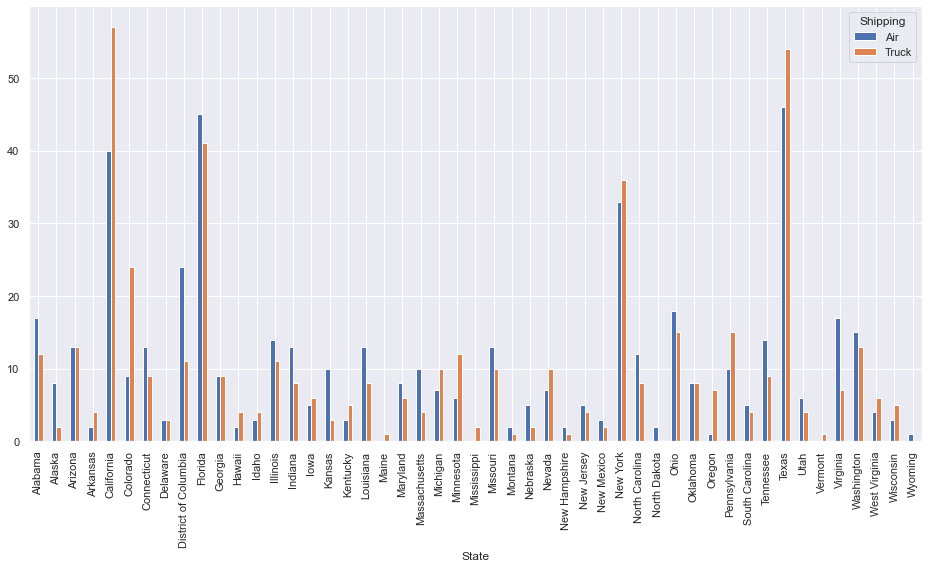

In [49]:
contigency.plot(figsize=(16,8), kind='bar')


In [46]:
# Using the chi2_contingency test 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 57.99511232372849 , Pvalue: 0.15295504380309213 , Degree of freedom: 48 ,expected frequencies: [[14.761 14.239]
 [ 5.09   4.91 ]
 [13.234 12.766]
 [ 3.054  2.946]
 [49.373 47.627]
 [16.797 16.203]
 [11.198 10.802]
 [ 3.054  2.946]
 [17.815 17.185]
 [43.774 42.226]
 [ 9.162  8.838]
 [ 3.054  2.946]
 [ 3.563  3.437]
 [12.725 12.275]
 [10.689 10.311]
 [ 5.599  5.401]
 [ 6.617  6.383]
 [ 4.072  3.928]
 [10.689 10.311]
 [ 0.509  0.491]
 [ 7.126  6.874]
 [ 7.126  6.874]
 [ 8.653  8.347]
 [ 9.162  8.838]
 [ 1.018  0.982]
 [11.707 11.293]
 [ 1.527  1.473]
 [ 3.563  3.437]
 [ 8.653  8.347]
 [ 1.527  1.473]
 [ 4.581  4.419]
 [ 2.545  2.455]
 [35.121 33.879]
 [10.18   9.82 ]
 [ 1.018  0.982]
 [16.797 16.203]
 [ 8.144  7.856]
 [ 4.072  3.928]
 [12.725 12.275]
 [ 4.581  4.419]
 [11.707 11.293]
 [50.9   49.1  ]
 [ 5.09   4.91 ]
 [ 0.509  0.491]
 [12.216 11.784]
 [14.252 13.748]
 [ 5.09   4.91 ]
 [ 4.072  3.928]
 [ 0.509  0.491]] 


In [50]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis
